In [1]:
from neurodsp.sim import sim_combined
from neurodsp.utils import create_times
import numpy as np
import scipy.signal as dsp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('ticks')
sns.set_context('poster')

In [3]:
fs = 500
n_seconds = 60
duration=2
overlap=0.5

sim_components = {'sim_powerlaw': {'exponent' : -1}, 
                  'sim_oscillation': {'freq' : 10}}


sig = sim_combined(n_seconds=n_seconds, fs=fs, components=sim_components)
times = create_times(n_seconds=n_seconds, fs=fs)

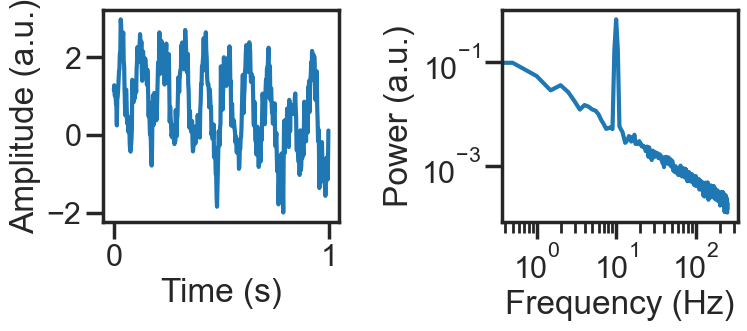

In [4]:


# %%
max_times = times < 1
f, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].plot(times[max_times], sig[max_times])
axes[0].set_ylabel('Amplitude (a.u.)')
axes[0].set_xlabel('Time (s)')
freq, psd = dsp.welch(sig, fs=fs, nperseg=duration*fs, noverlap=duration*fs*overlap)
axes[1].loglog(freq, psd)
axes[1].set_ylabel('Power (a.u.)')
axes[1].set_xlabel('Frequency (Hz)')

plt.tight_layout()

In [20]:
from pyrasa.irasa import irasa
from scipy.stats import zscore

freq_irasa, psd_ap, psd_p = irasa(zscore(sig), 
                                  fs=fs, 
                                  band=(1, 150), 
                                  kwargs_psd={'nperseg': duration*fs, 
                                             'noverlap': duration*fs*overlap
                                            },
                                hset_info=(1, 2, 0.05))

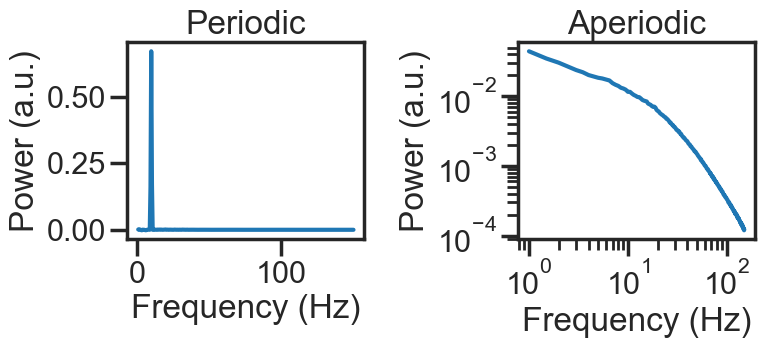

In [21]:
f, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].set_title('Periodic')
axes[0].plot(freq_irasa, psd_p[0,:])
axes[0].set_ylabel('Power (a.u.)')
axes[0].set_xlabel('Frequency (Hz)')
axes[1].set_title('Aperiodic')
axes[1].loglog(freq_irasa, psd_ap[0,:])
axes[1].set_ylabel('Power (a.u.)')
axes[1].set_xlabel('Frequency (Hz)')

f.tight_layout()

In [22]:
# %% get periodic stuff
from pyrasa.utils.peak_utils import get_peak_params
get_peak_params(psd_p, freqs=freq_irasa)

,ch_name,cf,bw,pw
0,0,10.0,1.435015,0.421387


In [23]:
# %% get aperiodic stuff
from pyrasa.utils.aperiodic_utils import compute_slope

ap_params, gof_params = compute_slope(aperiodic_spectrum=psd_ap,
                                       freqs=freq_irasa, 
                                       fit_func='fixed')
ap_params

,Offset,Exponent,fit_type,ch_name
0,-0.396709,1.521158,fixed,0


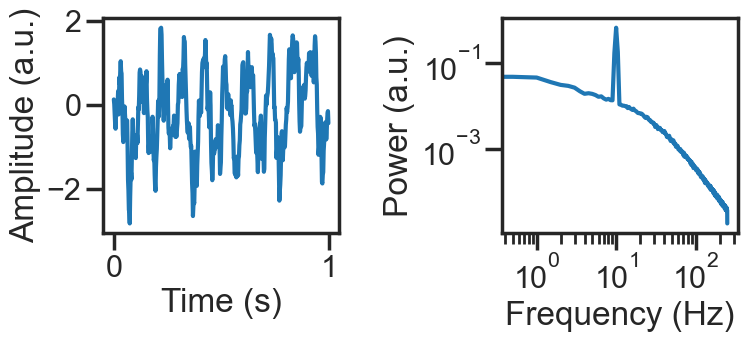

In [24]:
# %% Lets check the knee
knee_freq = 15
knee = knee_freq ** (2*.5 + 1.5)

sim_components = {'sim_knee': {'exponent1' : -.5, 'exponent2': -1.5, 'knee':knee }, 
                  'sim_oscillation': {'freq' : 10}}

sig = sim_combined(n_seconds=n_seconds, fs=fs, components=sim_components)
# %%
max_times = times < 1
f, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].plot(times[max_times], sig[max_times])
axes[0].set_ylabel('Amplitude (a.u.)')
axes[0].set_xlabel('Time (s)')
freq, psd = dsp.welch(sig, fs=fs, nperseg=duration*fs, noverlap=duration*fs*overlap)
axes[1].loglog(freq, psd)
axes[1].set_ylabel('Power (a.u.)')
axes[1].set_xlabel('Frequency (Hz)')

plt.tight_layout()

In [27]:
freq_irasa, psd_ap, psd_p = irasa(zscore(sig), 
                                  fs=fs, 
                                  band=(1, 150), 
                                  kwargs_psd={'nperseg': duration*fs, 
                                             'noverlap': duration*fs*overlap
                                            },
                                hset_info=(1, 2, 0.025))

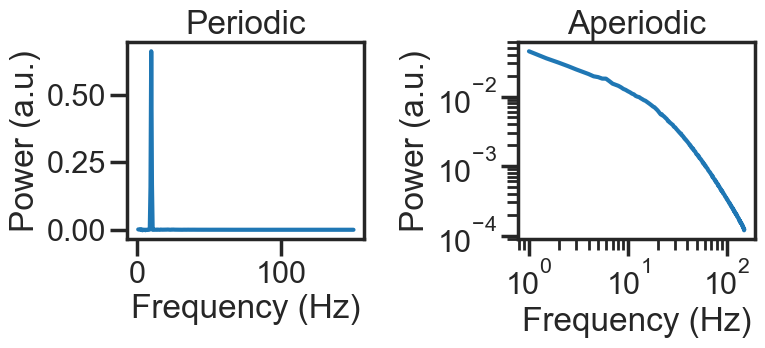

In [28]:
f, axes = plt.subplots(ncols=2, figsize=(8, 4))
axes[0].set_title('Periodic')
axes[0].plot(freq_irasa, psd_p[0,:])
axes[0].set_ylabel('Power (a.u.)')
axes[0].set_xlabel('Frequency (Hz)')
axes[1].set_title('Aperiodic')
axes[1].loglog(freq_irasa, psd_ap[0,:])
axes[1].set_ylabel('Power (a.u.)')
axes[1].set_xlabel('Frequency (Hz)')

f.tight_layout()

In [29]:
# %% get periodic stuff
from pyrasa.utils.peak_utils import get_peak_params
get_peak_params(psd_p, freqs=freq_irasa)


,ch_name,cf,bw,pw
0,0,10.0,1.434977,0.41499


In [30]:
# %% get aperiodic stuff
from pyrasa.utils.aperiodic_utils import compute_slope
ap_params_f, gof_params_f = compute_slope(aperiodic_spectrum=psd_ap, freqs=freq_irasa, fit_func='fixed')
ap_params_k, gof_params_k = compute_slope(aperiodic_spectrum=psd_ap, freqs=freq_irasa, fit_func='knee')


[4.48353818e-02 3.13035505e+02 1.17639233e+00 1.17639233e+00]


In [31]:
pd.concat([gof_params_f, gof_params_k])

,mse,r_squared,fit_type,ch_name
0,0.025508,0.936251,fixed,0
0,0.000056,0.999860,knee,0


In [32]:
ap_params_k

,Offset,Knee,Exponent_1,Exponent_2,Knee Frequency (Hz),fit_type,ch_name
0,1.490447,677.831935,0.532096,1.932553,8.805054,knee,0
